In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
df_market_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


In [27]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [18]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaler.fit(df_market_data)
scaled_data = scaler.transform(df_market_data)

In [19]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns)

# Set the coinid column as index
df_scaled.index = df_market_data.index

# Display sample data
df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [20]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(df_scaled) 
    inertia.append(model.inertia_)

print(inertia)

[287.0, 198.57181809798126, 145.63574772192862, 79.02243535120975, 66.21778006000338, 59.13907002537009, 48.406314490413614, 38.99358798927969, 34.40059545400235, 28.57360256096785, 23.890044355377952]


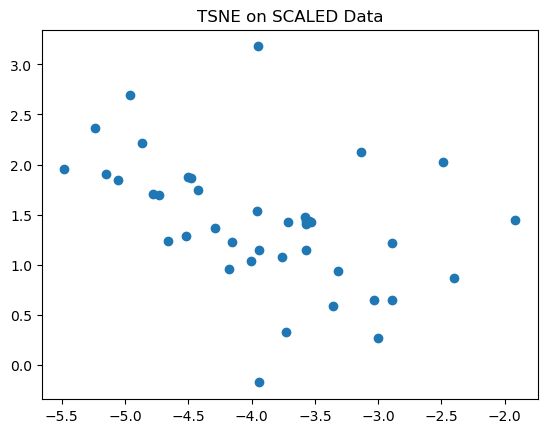

In [11]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
tsne = TSNE()
df_tsne1 = pd.DataFrame(tsne.fit_transform(df_scaled))

# Plot the clusters
plt.scatter(df_tsne1[0], df_tsne1[1])
plt.title("TSNE on SCALED Data")
plt.show()

In [25]:
# Create a dictionary with the data to plot the Elbow curve
elbow_plot = {
    "k": k_values,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_plot)

print(df_elbow.head())

   k     inertia
0  1  287.000000
1  2  198.571818
2  3  145.635748
3  4   79.022435
4  5   66.217780


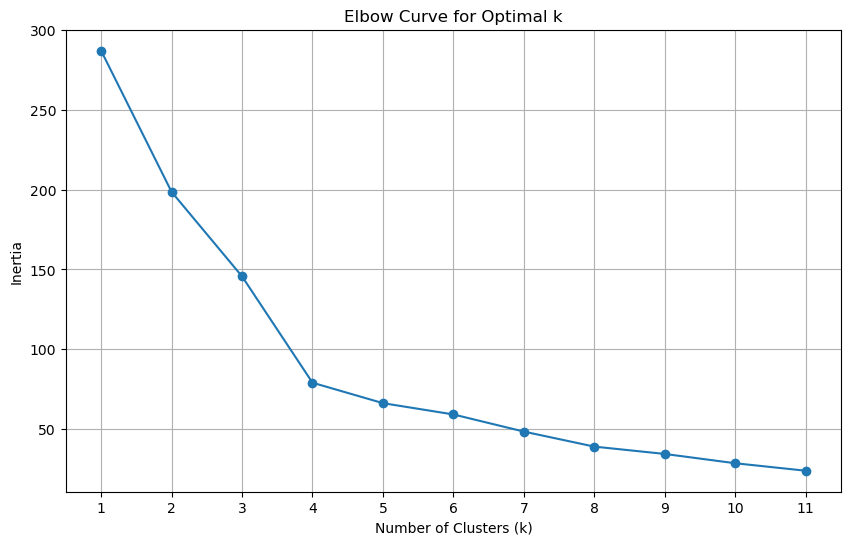

In [26]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(df_elbow['k'])  # Set x-ticks to the k values
plt.grid()
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:**  I would guess between 4 would be the best 'k' value because that is when the plot really starts to level out.I

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [37]:
# Initialize the K-Means model using the best value for k
best_k = 4  

# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=best_k, random_state=0)

In [38]:
# Fit the K-Means model using the scaled data
model.fit(df_scaled)


KMeans(n_clusters=4, random_state=0)

In [39]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = model.predict(df_scaled)

# Print the resulting array of cluster values.
print(cluster_labels)


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [40]:
# Create a copy of the DataFrame
df_copy = df_scaled.copy()


In [41]:
# Add a new column to the DataFrame with the predicted clusters
df_copy['cluster'] = cluster_labels

# Display sample data
print(df_copy.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [42]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
 7   cluster                       41 non-null     int32  
dtypes: float64(7), int32(1)
memory usage: 2.7+ KB


In [43]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = df_copy.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='cluster',
    hover_cols=['coin_id']
)

# Display the scatter plot
scatter_plot

:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [44]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [45]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_transformed = pca.fit_transform(df_scaled)

# Create a DataFrame from the PCA transformed data
df_pca = pd.DataFrame(data=pca_transformed, columns=['PC1', 'PC2', 'PC3'])

# View the first five rows of the DataFrame. 
print(df_pca.head(5))

        PC1       PC2       PC3
0 -0.600667  0.842760  0.461595
1 -0.458261  0.458466  0.952877
2 -0.433070 -0.168126 -0.641752
3 -0.471835 -0.222660 -0.479053
4 -1.157800  2.041209  1.859715


In [46]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

print("Explained Variance Ratio for each Principal Component:")
print(explained_variance)

Explained Variance Ratio for each Principal Component:
[0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total variance is 89.5%. 

In [48]:
n_components = len(df_scaled.columns)
pca=PCA(n_components=n_components)

# Fit the PCA model on the transformed credit card DataFrame
pca_data = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(pca_data, columns=["PCA_" + str(x) for x in range(1, n_components + 1)])
df_pca.index = df_scaled.index
# Display sample data
df_pca.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7
coin_id,,,,,,,
bitcoin,-0.600667,0.842760,0.461595,-0.109151,-0.033786,0.225703,0.006595
ethereum,-0.458261,0.458466,0.952877,0.095100,0.014588,-0.034158,0.109593
tether,-0.433070,-0.168126,-0.641752,-0.470282,0.115300,0.127710,-0.086857
ripple,-0.471835,-0.222660,-0.479053,-0.737473,-0.148641,0.273472,0.134870
bitcoin-cash,-1.157800,2.041209,1.859715,0.236479,-0.191787,0.411513,-0.070411


---

### Find the Best Value for k Using the PCA Data

In [53]:
X = df_pca

In [54]:
# Create a list with the number of k-values from 1 to 11
k_pca = list(range(1, 12))

In [63]:
# Create an empty list to store the inertia values
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_pca:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(df_pca) 
    inertia_pca.append(model.inertia_)

print(inertia_pca)

[287.0000000000002, 212.1233420748627, 165.13675233446813, 79.0224353512098, 66.41305075939441, 61.63408811068226, 46.07446744103022, 43.3926941173483, 32.91322265971527, 30.469111293270373, 26.48010137439894]


In [64]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {
    "k": k_pca,
    "inertia": inertia_pca 
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

# Display the first few rows of the DataFrame
print(df_elbow_pca.head())

   k     inertia
0  1  287.000000
1  2  212.123342
2  3  165.136752
3  4   79.022435
4  5   66.413051


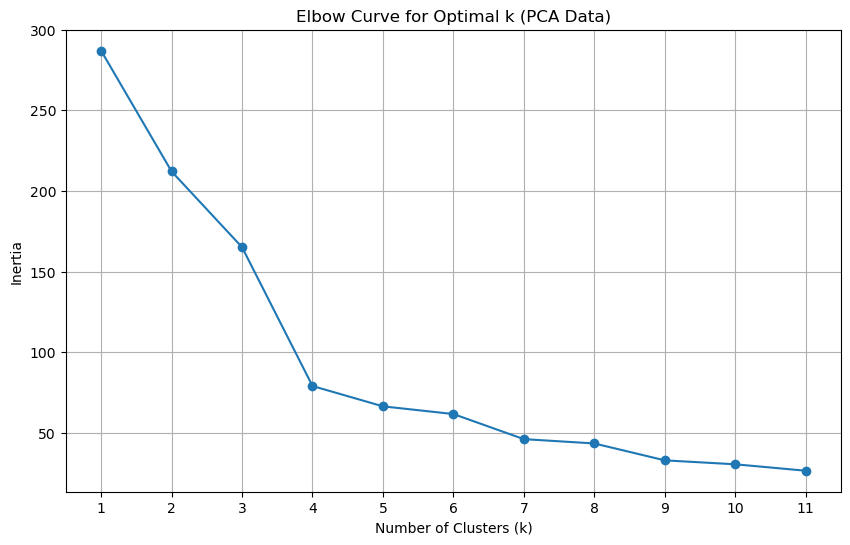

In [65]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(df_elbow_pca['k'], df_elbow_pca['inertia'], marker='o')
plt.title('Elbow Curve for Optimal k (PCA Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(df_elbow_pca['k'])  # Set x-ticks to the k values
plt.grid()
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4 because it is when the curve starts to even out.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No. There seems to be a steeper decline but the overall value is the same.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [66]:
# Initialize the K-Means model using the best value for k
pca_k = 4
model = KMeans(n_clusters=pca_k, random_state=0)

In [67]:
# Fit the K-Means model using the PCA data
model.fit(df_pca)

KMeans(n_clusters=4, random_state=0)

In [68]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_labels_pca = model.predict(df_pca)

# Print the resulting array of cluster values.
print(cluster_labels_pca)


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [69]:
# Create a copy of the DataFrame with the PCA data
df_pca_copy = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_copy['cluster'] = cluster_labels_pca

# Display sample data
print(df_pca_copy.head())

                 PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6  \
coin_id                                                                    
bitcoin      -0.600667  0.842760  0.461595 -0.109151 -0.033786  0.225703   
ethereum     -0.458261  0.458466  0.952877  0.095100  0.014588 -0.034158   
tether       -0.433070 -0.168126 -0.641752 -0.470282  0.115300  0.127710   
ripple       -0.471835 -0.222660 -0.479053 -0.737473 -0.148641  0.273472   
bitcoin-cash -1.157800  2.041209  1.859715  0.236479 -0.191787  0.411513   

                 PCA_7  cluster  
coin_id                          
bitcoin       0.006595        2  
ethereum      0.109593        2  
tether       -0.086857        0  
ripple        0.134870        0  
bitcoin-cash -0.070411        2  


In [74]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot_pca = df_pca_copy.hvplot.scatter(
    x='PCA_1',                
    y='PCA_2',                
    by='cluster',           
    hover_cols=['coin_id'] 
)

# Display the scatter plot
scatter_plot_pca

:NdOverlay   [cluster]
   :Scatter   [PCA_1]   (PCA_2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [76]:
# Composite plot to contrast the Elbow curves
composite_plot = df_elbow + df_elbow_pca
composite_plot

,k,inertia
0,2,574.000000
1,4,410.695160
2,6,310.772500
3,8,158.044871
4,10,132.630831
5,12,120.773158
6,14,94.480782
7,16,82.386282
8,18,67.313818
9,20,59.042714


In [79]:
# Composite plot to contrast the clusters
composite_clusters_plot = scatter_plot + scatter_plot_pca
composite_clusters_plot


:Layout
   .NdOverlay.I  :NdOverlay   [cluster]
      :Scatter   [PCA_1]   (PCA_2,coin_id)
   .NdOverlay.II :NdOverlay   [cluster]
      :Scatter   [PCA_1]   (PCA_2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** So my visualizations are not showing appropriately despite them having distinct different names in the code. However, knowing the data is important to understand how simplified you can be. If there are only a few answers to a question and there are a few outliers here and there, those outliers cannot necessarily be explained and may as well be grouped in with whatever is closest. This can take out some of the 'noise' of the data if necessary . Interpretation becomes easier and understanding. It can also be something bad if it gets too oversimplified because you may miss out on a new trend coming in play that may play a larger impact than previously expected. If data stayed the same, we wouldn't need to constantly collect it in order to understand what is going on. 